# Data Cleaning and Exploratory Analysis for Flight Price Prediction

## Importing Packages and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
train_df = pd.read_excel(r'Downloads\Data_Train.xlsx')

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_df = pd.read_excel(r'Downloads\Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
combined_df = train_df.append(test_df)
combined_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [7]:
combined_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [8]:
combined_df[combined_df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [9]:
# Remove one row with null route and total stops
combined_df = combined_df[combined_df['Route'].notna()]

## Exploring the Target Variable: Price

### What is the range of ticket prices?

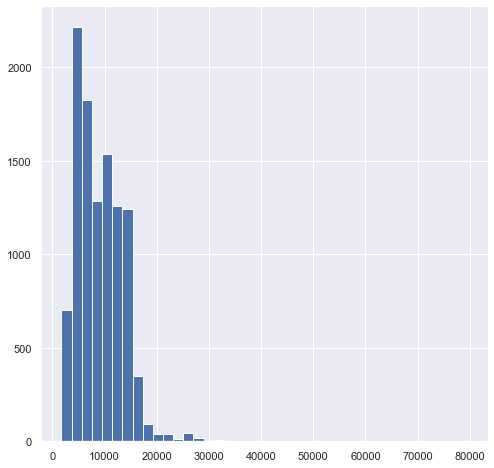

In [10]:
fig = plt.figure(figsize=(8,8))
plt.hist(combined_df['Price'], bins = 40)
plt.show()

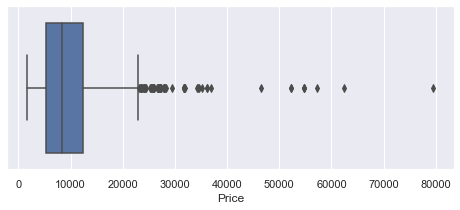

In [11]:
fig = plt.figure(figsize=(8,3))
sns.boxplot(x=combined_df['Price'])
plt.show()

In [12]:
combined_df['Price'].describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

## Feature Engineering

### Transforming Numerical Features

#### Date of Journey
Create day, month, and year features.

In [13]:
combined_df['Day'] = combined_df['Date_of_Journey'].str.split('/').str[0]
combined_df['Month'] = combined_df['Date_of_Journey'].str.split('/').str[1]
combined_df['Year'] = combined_df['Date_of_Journey'].str.split('/').str[2]

In [14]:
combined_df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019


In [15]:
combined_df['Day'] = combined_df['Day'].astype(int)
combined_df['Month'] = combined_df['Month'].astype(int)
combined_df['Year'] = combined_df['Year'].astype(int)

In [16]:
combined_df.drop('Date_of_Journey', axis = 1, inplace = True)

#### Arrival Time
Create features for hour and minute

In [17]:
combined_df['Arrival_Time'] = combined_df['Arrival_Time'].apply(lambda x: x.split(' ')[0])
combined_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [18]:
combined_df['Arrival_Hour'] = combined_df['Arrival_Time'].apply(lambda x: x.split(':')[0])
combined_df['Arrival_Min'] = combined_df['Arrival_Time'].apply(lambda x: x.split(':')[1])

combined_df['Arrival_Hour'] = combined_df['Arrival_Hour'].astype(int)
combined_df['Arrival_Min'] = combined_df['Arrival_Min'].astype(int)

combined_df.drop('Arrival_Time', axis = 1, inplace = True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13353 non-null  object 
 5   Duration         13353 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13353 non-null  object 
 8   Price            10682 non-null  float64
 9   Day              13353 non-null  int32  
 10  Month            13353 non-null  int32  
 11  Year             13353 non-null  int32  
 12  Arrival_Hour     13353 non-null  int32  
 13  Arrival_Min      13353 non-null  int32  
dtypes: float64(1), int32(5), object(8)
memory usage: 1.3+ MB


#### Departure Time

In [19]:
combined_df['Dep_Hour'] = combined_df['Dep_Time'].apply(lambda x: x.split(':')[0])
combined_df['Dep_Min'] = combined_df['Dep_Time'].apply(lambda x: x.split(':')[1])

combined_df['Dep_Hour'] = combined_df['Dep_Hour'].astype(int)
combined_df['Dep_Min'] = combined_df['Dep_Min'].astype(int)

combined_df.drop('Dep_Time', axis = 1, inplace = True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13353 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13353 non-null  object 
 7   Price            10682 non-null  float64
 8   Day              13353 non-null  int32  
 9   Month            13353 non-null  int32  
 10  Year             13353 non-null  int32  
 11  Arrival_Hour     13353 non-null  int32  
 12  Arrival_Min      13353 non-null  int32  
 13  Dep_Hour         13353 non-null  int32  
 14  Dep_Min          13353 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [20]:
price_arrival_df = combined_df[~combined_df['Price'].isnull()]
price_arrival_df = price_arrival_df.groupby('Arrival_Hour')['Price'].mean().reset_index()

In [21]:
price_dep_df = combined_df[~combined_df['Price'].isnull()]
price_dep_df = price_dep_df.groupby('Dep_Hour')['Price'].mean().reset_index()

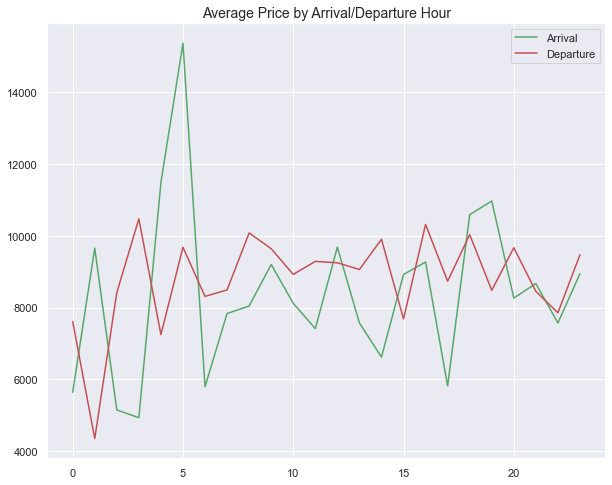

In [22]:
fig = plt.figure(figsize=(10,8))
plt.plot(price_arrival_df['Arrival_Hour'], price_arrival_df['Price'], linewidth = 1.5, color = 'g', label = 'Arrival')
plt.plot(price_dep_df['Dep_Hour'], price_dep_df['Price'], linewidth = 1.5, color = 'r', label = 'Departure')
plt.title('Average Price by Arrival/Departure Hour', fontsize = 14)
plt.legend()
plt.show()

#### Duration

In [23]:
combined_df['Duration'].value_counts()

2h 50m     672
1h 30m     493
2h 45m     432
2h 55m     418
2h 35m     399
          ... 
29h 10m      1
32h 55m      1
31h 30m      1
35h 20m      1
32h 25m      1
Name: Duration, Length: 374, dtype: int64

In [24]:
combined_df = combined_df[combined_df['Duration']!='5m']

In [25]:
combined_df['Duration_Hour'] = (combined_df['Duration'].str.split('h').str[0]).astype(int)

In [26]:
combined_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50,4


In [27]:
combined_df['Duration_Min'] = (combined_df['Duration'].str.split(' ').str[1].str.split('m').str[0])
combined_df['Duration_Min'] = combined_df['Duration_Min'].fillna(0).astype(int)

combined_df['Duration_Min'] = (combined_df['Duration_Hour']*60)+(combined_df['Duration_Min'])
combined_df.drop('Duration_Hour', axis = 1, inplace = True)
combined_df.drop('Duration', axis = 1, inplace = True)

In [28]:
combined_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,1,3,2019,21,35,16,50,285


### Transforming Categorical Features
Airline, Source, Destination, Total_Stops, Additional_Info

#### Airline

In [29]:
combined_df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2189
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

With there being so few flights for Multiple carriers Premium economy, Jet Airways Business, and Vistara Premium economy, I will merge them into their broader airline category value.

In [30]:
combined_df['Airline'] = combined_df['Airline'].str.replace(' Premium economy','')
combined_df['Airline'] = combined_df['Airline'].str.replace(' Business','')

In [31]:
# Saving flight category columns to separate csv before encoding
# Flight category columns will help us in data visualization in evaluating predictions

flight_categories = combined_df[['Airline','Source','Destination','Route','Total_Stops']]
flight_categories.to_csv(r'Documents\Flight_Categories.csv',index=False)

In [32]:
airline_price_df = combined_df[~combined_df['Price'].isnull()]
airline_price_df = airline_price_df.groupby('Airline')['Price'].mean().reset_index().sort_values('Price')

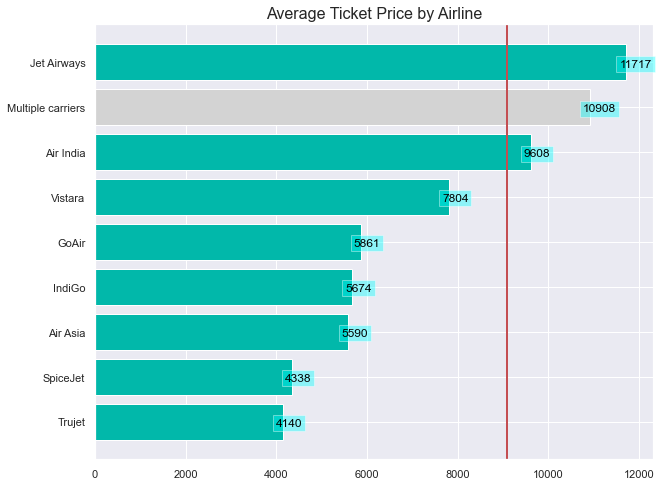

In [33]:
avg_ticket_price = combined_df[~combined_df['Price'].isnull()]['Price'].mean()
colors = []
for airline in list(airline_price_df['Airline'].unique()):
    if 'Multiple' in airline:
        colors.append('lightgrey')
    else:
        colors.append('#01b8aa')

fig = plt.figure(figsize=(10,8))
plt.barh(airline_price_df['Airline'], airline_price_df['Price'], color = colors)
for i, v in enumerate(airline_price_df['Price']):
    plt.text(v-150, i-.1, str(round(v)), color = 'black', 
             Bbox = dict(facecolor = 'cyan', alpha =.4, pad = 3))
plt.axvline(x=avg_ticket_price, color='r', linestyle='-', linewidth = 2)
plt.title('Average Ticket Price by Airline', fontsize= 16)
plt.show()

**Thoughts**

Jet Airways has on average the most expensive ticket. Excluding the multiple carriers category, Air India is the only other airline that has an above average ticket price. Outside of Jet Airways and Air India, most of these airlines are considered low-cost or regional carriers, so it makes sense that their average ticket prices are lower than the larger airlines.

#### One-Hot Encoding of the Airline category

In [34]:
airline = pd.get_dummies(combined_df['Airline'], drop_first=True)
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [35]:
combined_df = pd.concat([combined_df, airline], axis = 1)
combined_df.drop('Airline',axis=1, inplace = True)

In [36]:
combined_df.head()

,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Min,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,2019,1,10,22,20,170,0,0,1,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,2019,13,15,5,50,445,1,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9,6,2019,4,25,9,25,1140,0,0,0,1,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,12,5,2019,23,30,18,5,325,0,0,1,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,1,3,2019,21,35,16,50,285,0,0,1,0,0,0,0,0


#### Route

In [37]:
routes = combined_df.groupby('Route').size().reset_index().sort_values(0,ascending = False).head(10)
routes = routes.rename(columns={0:'Count'})
routes = routes.sort_values(by='Count')
routes['Stops'] = routes['Route'].str.count('→')-1
routes['Stops'] = routes['Stops'].apply(lambda x: 'Non-stop' if x == 0 else '1+ stop')

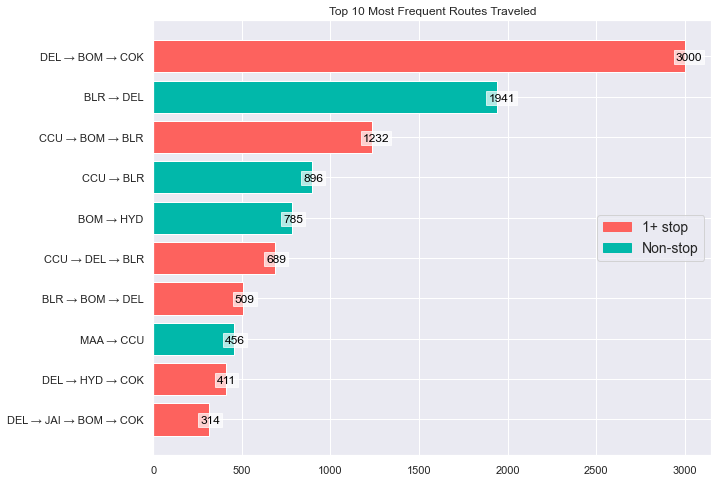

In [38]:
import matplotlib.patches as mpatches

colors = []
for stops in list(routes['Stops']):
    if stops == '1+ stop':
        colors.append('#fd625e')
    else:
        colors.append('#01b8aa')      

fig = plt.figure(figsize=(10,8))
plt.barh(routes['Route'], routes['Count'], color=colors)

one_stop = mpatches.Patch(color='#fd625e', label='1+ stop')
non_stop = mpatches.Patch(color='#01b8aa', label='Non-stop')
plt.legend(handles = [one_stop, non_stop], fontsize = 14, loc = 'center right')
plt.title('Top 10 Most Frequent Routes Traveled')
for i, v in enumerate(routes['Count']):
    plt.text(v-50, i-.1, str(v), color = 'black', fontsize = 12,
            Bbox = dict(facecolor = 'white', alpha =.7, pad = 2))

**Thoughts**

6 out of the top 10 routes traveled include 1 or more stops, which I find very suprising. Going from Kolkata (CCU) to Bangalore (BLR), the direct flight has been less traveled than the indirect route that stops in Mumbai (BOM). It will be interesting to see how the prevalence of 1+ stop routes, which results in longer flight duration, impacts our prediction model.

In [39]:
combined_df['Route_1'] = combined_df['Route'].str.split('→ ').str[0]
combined_df['Route_2'] = combined_df['Route'].str.split('→ ').str[1]
combined_df['Route_3'] = combined_df['Route'].str.split('→ ').str[2]
combined_df['Route_4'] = combined_df['Route'].str.split('→ ').str[3]
combined_df['Route_5'] = combined_df['Route'].str.split('→ ').str[4]

In [40]:
combined_df['Route_1'].fillna("None", inplace = True)
combined_df['Route_2'].fillna("None", inplace = True)
combined_df['Route_3'].fillna("None", inplace = True)
combined_df['Route_4'].fillna("None", inplace = True)
combined_df['Route_5'].fillna("None", inplace = True)

In [41]:
encoder = LabelEncoder()

for route in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    combined_df[route] = encoder.fit_transform(combined_df[route])
    
combined_df.drop('Route', axis = 1, inplace=True)

In [42]:
combined_df.head()

,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Min,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara,Route_1,Route_2,Route_3,Route_4,Route_5
0,Banglore,New Delhi,non-stop,No info,3897.0,24,3,2019,1,10,22,20,170,0,0,1,0,0,0,0,0,0,13,24,12,4
1,Kolkata,Banglore,2 stops,No info,7662.0,1,5,2019,13,15,5,50,445,1,0,0,0,0,0,0,0,2,25,1,3,4
2,Delhi,Cochin,2 stops,No info,13882.0,9,6,2019,4,25,9,25,1140,0,0,0,1,0,0,0,0,3,32,4,5,4
3,Kolkata,Banglore,1 stop,No info,6218.0,12,5,2019,23,30,18,5,325,0,0,1,0,0,0,0,0,2,34,3,12,4
4,Banglore,New Delhi,1 stop,No info,13302.0,1,3,2019,21,35,16,50,285,0,0,1,0,0,0,0,0,0,34,8,12,4


#### Total Stops

In [43]:
combined_df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1897
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [44]:
combined_df['Total_Stops'] = combined_df['Total_Stops'].map({'non-stop': 0,
                                             '1 stop': 1,
                                             '2 stops': 2,
                                             '3 stops': 3,
                                             '4 stops': 4})

#### Source

In [45]:
source_price_df = combined_df[~combined_df['Price'].isnull()]
source_price_df = source_price_df.groupby('Source')['Price'].mean().reset_index().sort_values('Price', ascending=False)

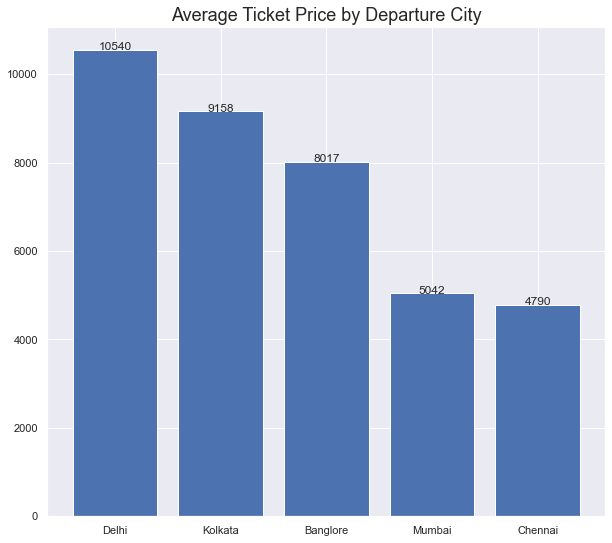

In [46]:
fig = plt.figure(figsize=(10,9))
plt.bar(source_price_df['Source'], source_price_df['Price'])

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],round(y[i]), ha = 'center')
        
addlabels(list(source_price_df['Source']), list(source_price_df['Price']))
plt.title('Average Ticket Price by Departure City', fontsize =18)
plt.show()

#### One Hot Encoding of the Source category

In [47]:
source=pd.get_dummies(combined_df['Source'],drop_first=True)
source = source.add_suffix('_source')
source.head()

,Chennai_source,Delhi_source,Kolkata_source,Mumbai_source
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [48]:
combined_df = pd.concat([combined_df, source], axis = 1)
combined_df.drop('Source',axis = 1, inplace = True)
combined_df.head()

,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Min,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara,Route_1,Route_2,Route_3,Route_4,Route_5,Chennai_source,Delhi_source,Kolkata_source,Mumbai_source
0,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,170,0,0,1,0,0,0,0,0,0,13,24,12,4,0,0,0,0
1,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,445,1,0,0,0,0,0,0,0,2,25,1,3,4,0,0,1,0
2,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,1140,0,0,0,1,0,0,0,0,3,32,4,5,4,0,1,0,0
3,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,325,0,0,1,0,0,0,0,0,2,34,3,12,4,0,0,1,0
4,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,285,0,0,1,0,0,0,0,0,0,34,8,12,4,0,0,0,0


#### Destination

In [49]:
combined_df['Destination'].value_counts()

Cochin       5681
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     881
Kolkata       456
Name: Destination, dtype: int64

In [50]:
# Grouping Delhi and New Delhi together
combined_df['Destination'] = combined_df['Destination'].str.replace('New ', '')

In [51]:
destination=pd.get_dummies(combined_df['Destination'],drop_first=True)
destination = destination.add_suffix('_dest')
destination.head()

,Cochin_dest,Delhi_dest,Hyderabad_dest,Kolkata_dest
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [52]:
combined_df = pd.concat([combined_df, destination], axis = 1)
combined_df.drop('Destination',axis = 1, inplace = True)
combined_df.head()

,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Min,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara,Route_1,Route_2,Route_3,Route_4,Route_5,Chennai_source,Delhi_source,Kolkata_source,Mumbai_source,Cochin_dest,Delhi_dest,Hyderabad_dest,Kolkata_dest
0,0,No info,3897.0,24,3,2019,1,10,22,20,170,0,0,1,0,0,0,0,0,0,13,24,12,4,0,0,0,0,0,1,0,0
1,2,No info,7662.0,1,5,2019,13,15,5,50,445,1,0,0,0,0,0,0,0,2,25,1,3,4,0,0,1,0,0,0,0,0
2,2,No info,13882.0,9,6,2019,4,25,9,25,1140,0,0,0,1,0,0,0,0,3,32,4,5,4,0,1,0,0,1,0,0,0
3,1,No info,6218.0,12,5,2019,23,30,18,5,325,0,0,1,0,0,0,0,0,2,34,3,12,4,0,0,1,0,0,0,0,0
4,1,No info,13302.0,1,3,2019,21,35,16,50,285,0,0,1,0,0,0,0,0,0,34,8,12,4,0,0,0,0,0,1,0,0


In [53]:
# Dropping the Additional Info column
combined_df.drop('Additional_Info', axis = 1, inplace = True)

In [54]:
combined_df.to_csv(r'Documents\Flight_Price.csv',index=False)